## HomeWork 1 Due at Mid-night 3/10/2021

### This homework is on Exploratory Data Analysis and will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Professor Salaries dataset ##

In [3]:
df = pd.read_csv("Salaries1.csv")
print(df.shape)
df.head()

(401, 6)


,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18,Male,139750
1,Prof,B,20.0,16,Male,173200
2,AsstProf,B,4.0,3,Male,79750
3,Prof,B,45.0,39,Male,115000
4,Prof,B,40.0,41,Male,141500


In [4]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
396,Prof,A,33.0,30,Male,103106
397,Prof,A,31.0,19,Male,150564
398,Prof,A,42.0,25,Male,101738
399,Prof,A,25.0,15,Male,95329
400,AsstProf,A,8.0,4,Male,81035


In [5]:
df.Discipline.unique()

array(['B', 'A'], dtype=object)

In [6]:
df.Rank.unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

## Question 1. Check if there are any nulls or NA's.

In [7]:
df.isnull().any()

Rank            False
Discipline      False
YrsSincePhd      True
YrsOfService    False
Sex              True
Salary          False
dtype: bool

## Question 2. Remove any rows that have nulls or NA's.

In [8]:
df.isnull().any()
df = df.dropna()

## Question 3. Check if there are any outliers in all numerical fields using scatter plots and boxplots.

<AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>

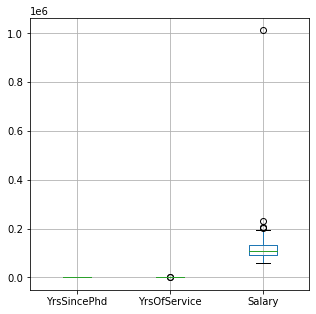

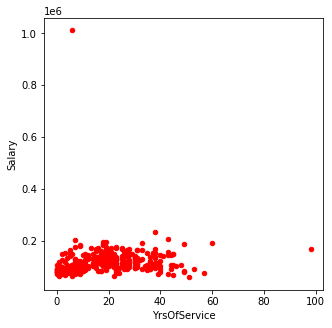

In [9]:
box = df.boxplot(figsize = (5,5))
df.plot.scatter(x = 'YrsOfService', y = 'Salary' , c = 'red' , figsize = (5,5))
# plt.show()

## Question 4. Display and remove the outlier rows. 

<AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>

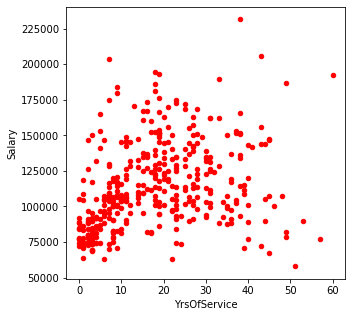

In [10]:
first = df['Salary'] < 1 * 10 ** 6
second = df['YrsOfService'] < 75
cleanedDf = df.dropna()
# df = cleanedDf
cleanedDf = cleanedDf.dropna()
cleanedDf[first & second].plot.scatter(x = 'YrsOfService', y = 'Salary' , c = 'red' , figsize = (5,5))


## Question 5. Calculate the average years of service for each rank using SQL. Then, Calculate the average years of service for each sex using SQL.

In [11]:
firstAns = "SELECT Rank, avg(YrsOfService) from df GROUP BY Rank"
firstQuery = ps.sqldf(firstAns)
firstQuery

,Rank,avg(YrsOfService)
0,AssocProf,11.861538
1,AsstProf,2.373134
2,Prof,23.097378


In [12]:
secondAns = "SELECT Sex, avg(YrsOfService) from df WHERE Sex != 'None' GROUP BY Sex"
secondQuery = ps.sqldf(secondAns)
secondQuery

,Sex,avg(YrsOfService)
0,Female,11.564103
1,Male,18.461111


## Question 6. Calculate the average salary by discipline using SQL. Then, calculate the average salary by sex using SQL.

In [13]:
firstAns = "SELECT avg(salary), discipline from df GROUP BY discipline"
firstQuery = ps.sqldf(firstAns)
firstQuery

,avg(salary),Discipline
0,108548.430939,A
1,122350.100917,B


In [14]:
secondAns = "SELECT avg(salary) , Sex from df GROUP BY Sex"
firstQuery = ps.sqldf(secondAns)
secondQuery


,Sex,avg(YrsOfService)
0,Female,11.564103
1,Male,18.461111


## Question 7. For each rank, calculate the number of occurences, the mean salary, the minimum salary, and the maximum salary using one SQL statement.

In [15]:
firstAns = "SELECT Rank, Salary, count(*) as [Number of Occurences], avg(Salary), min(Salary), max(Salary) from cleanedDf GROUP BY Rank"
firstQuery = ps.sqldf(firstAns)
firstQuery

,Rank,Salary,Number of Occurences,avg(Salary),min(Salary),max(Salary)
0,AssocProf,1012100,65,108002.953846,62884,1012100
1,AsstProf,97032,67,80775.985075,63100,97032
2,Prof,231545,267,126919.119850,57800,231545


## Question 8. Answer Question 7 using Pandas functions

In [16]:
df.groupby("Rank")["Salary"].describe()[['count', 'mean', 'min', 'max']]

,count,mean,min,max
Rank,,,,
AssocProf,65.0,108002.953846,62884.0,1012100.0
AsstProf,67.0,80775.985075,63100.0,97032.0
Prof,267.0,126919.119850,57800.0,231545.0


## Question 9. Calculate the standard deviation, skew and kurtosis for YrsSincePhd, YrsOfService and salary for each rank.

In [17]:
rankdf = df.groupby(['Rank'])
yearsSincePhd = rankdf['YrsSincePhd']
yearsOfService = rankdf['YrsOfService']
salary = rankdf['Salary']


In [18]:
yearsSincePhd.std()

Rank
AssocProf     9.621390
AsstProf      2.541381
Prof         10.107256
Name: YrsSincePhd, dtype: float64

In [19]:
yearsOfService.std()

Rank
AssocProf    10.048129
AsstProf      1.495811
Prof         12.450121
Name: YrsOfService, dtype: float64

In [20]:
salary.std()

Rank
AssocProf    114715.416463
AsstProf       8174.112637
Prof          27770.613192
Name: Salary, dtype: float64

In [21]:
yearsSincePhd.skew()

Rank
AssocProf    2.154587
AsstProf     0.524578
Prof         0.350047
Name: YrsSincePhd, dtype: float64

In [22]:
yearsOfService.skew()

Rank
AssocProf    2.444009
AsstProf    -0.026995
Prof         1.126002
Name: YrsOfService, dtype: float64

In [23]:
salary.skew()

Rank
AssocProf    7.884208
AsstProf     0.082975
Prof         0.579175
Name: Salary, dtype: float64

In [24]:
yearsSincePhd.apply(pd.DataFrame.kurtosis)

Rank
AssocProf    4.498964
AsstProf    -0.358052
Prof        -0.628736
Name: YrsSincePhd, dtype: float64

In [25]:
yearsOfService.apply(pd.DataFrame.kurtosis)

Rank
AssocProf    6.482293
AsstProf    -0.658746
Prof         4.074451
Name: YrsOfService, dtype: float64

In [26]:
salary.apply(pd.DataFrame.kurtosis)

Rank
AssocProf    63.065532
AsstProf     -0.920936
Prof          0.340466
Name: Salary, dtype: float64

## Question 10. Plot the histogram of YrsOfService and Salary for different Ranks using 5 bins

array([[<AxesSubplot:title={'center':'AssocProf'}>,
        <AxesSubplot:title={'center':'AsstProf'}>],
       [<AxesSubplot:title={'center':'Prof'}>, <AxesSubplot:>]],
      dtype=object)

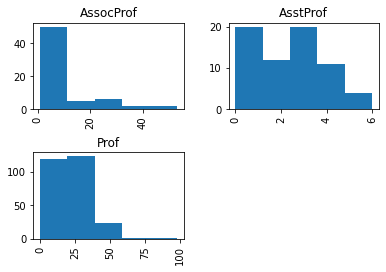

In [27]:
df["YrsOfService"].hist(by=df["Rank"],bins = 5)

array([[<AxesSubplot:title={'center':'AssocProf'}>,
        <AxesSubplot:title={'center':'AsstProf'}>],
       [<AxesSubplot:title={'center':'Prof'}>, <AxesSubplot:>]],
      dtype=object)

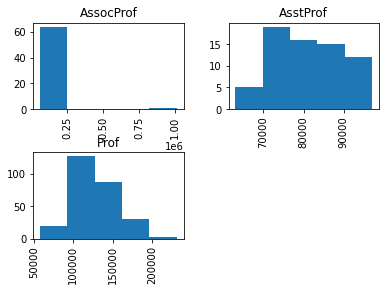

In [28]:
df["Salary"].hist(by=df["Rank"],bins = 5)

## Question 11. Describe the YrsOfService and Salary distributions for each rank. Use the skew and kurotsis in your descriptions.
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

For the skew of years of service, Assoc professors have a higher skew than the other ranks. Assoc and Prof have postitive skews and AsstProf have negative skew.

When we look at the skew of the salaries, all ranks have a positive skew but Assoc professors have a higher skew than the other ranks. 

Moving onto the kurtosis of years of service, Assoc and Profs have positive kurtosis while AsstProfs have negative kurtosis. 

Looking at the kurtosis of salary, Assoc professors and profs have positive kurtosis but Assoc professors have a way higher kurtosis than profs. Asst professors has a negative kurtosis.  

Since Assoc professors have a higher positive skew and positive kurtosis; more years served and more money earned. 
Asst professors have a negative skew and negative kurtosis. They have less years served and less money.
Profs have positive skew and kurtosis, but its not as high as Assoc professors. Less years served and less money earned. 
 

## Question 12. Calculate correlations of all the factors among themselves and determine which factors among YrsSincePhd or YrsOfService will affect Salary the most. Will your answers change if you break it down by Sex and by Discipline?

In [29]:
df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.885469,0.189476
YrsOfService,0.885469,1.000000,0.156141
Salary,0.189476,0.156141,1.000000


The factors that affect salary the most is years since phd. 
Our answers may change if we break it down by sex and discipline because we'll have more factors to consider. 
For example, it may be possible that certain disciplines make more money than the other or a certain sex makes more. 

### Now Load a different dataset (MPG dataset number 3)

In [30]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code here to fix the missing values by imputing value from the mean

In [31]:
print(mpg.isnull().any())

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


In [37]:
mpg['mpg'] = mpg['mpg'].fillna(mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna(mpg['weight'].mean())
print(mpg.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
